In [308]:
from consensus import load_cancer_type, load_data
import pandas as pd
import numpy as np
import dcor
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
b_int = pd.read_csv('/home/MarkF/DivideConquer/ICA/Results/Cancer_type/Biological_int.csv', index_col=0)
b_int = b_int[b_int['Score'] > 0.504]
b_int_components = list(set(b_int[['Small Component', 'Small2 Component']].values.ravel()))
b_int_components
cluster = b_int_components

In [310]:
b_int

Small Component  \
86         consensus independent component 105_Lymphoma   
507    consensus independent component 133_Brain cancer   
2555             consensus independent component 54_HCC   
1994  consensus independent component 35_Myelodyspla...   
2172  consensus independent component 41_Gastric cancer   
2922         consensus independent component 6_Melanoma   
2072           consensus independent component 38_HNSCC   
3384         consensus independent component 93_Sarcoma   
2537  consensus independent component 53_Prostate ca...   

                                 Big Component  \
86    consensus independent component 1655_big   
507   consensus independent component 1235_big   
2555  consensus independent component 2439_big   
1994  consensus independent component 2439_big   
2172  consensus independent component 1655_big   
2922  consensus independent component 1655_big   
2072  consensus independent component 2439_big   
3384   consensus independent component 855_big   
2537   consensus independent component 855_big   

                                       Small2 Component  \
86    consensus independent component 77_Multiple my...   
507        consensus independent component 105_Lymphoma   
2555     consensus independent component 7_Renal cancer   
1994       consensus independent component 105_Lymphoma   
2172     consensus independent component 7_Renal cancer   
2922       consensus independent component 105_Lymphoma   
2072       consensus independent component 105_Lymphoma   
3384     consensus independent component 7_Renal cancer   
2537     consensus independent component 7_Renal cancer   

                                Big2 Component     Score  
86     consensus independent component 885_big  0.578689  
507   consensus independent component 1655_big  0.571041  
2555  consensus independent component 3726_big  0.570593  
1994  consensus independent component 1655_big  0.567261  
2172  consensus independent component 3726_big  0.563479  
2922  consensus independent component 1655_big  0.560476  
2072  consensus independent component 1655_big  0.546864  
3384  consensus independent component 3726_big  0.529575  
2537  consensus independent component 3726_big  0.518656

In [311]:
# Load the cancer data
small_data, bigdata, lookup_columns = load_cancer_type('/home/MarkF/DivideConquer/Results/GPL570')

# Merge the data
big_small_data = small_data[0]
for i in range(1, len(small_data)):
    big_small_data = pd.merge(left=big_small_data, right=small_data[i], left_index=True, right_index=True)

df_full = pd.merge(left=big_small_data, right=bigdata, left_index=True, right_index=True)


Number of components split Lung cancer: 193
Number of components split Gastric cancer: 195
Number of components split Breast cancer: 339
Number of components split Sarcoma: 325
Number of components split Colorectal cancer: 190
Number of components split Prostate cancer: 106
Number of components split Renal cancer: 138
Number of components split HCC: 190
Number of components split Ovarian cancer: 158
Number of components split Lymphoma: 167
Number of components split Multiple myeloma: 89
Number of components split Normal: 605
Number of components split Leukemia: 102
Number of components split Adrenal cancer: 113
Number of components split Myelodysplastic syndrome: 84
Number of components split Brain cancer: 156
Number of components split Melanoma: 194
Number of components split HNSCC: 155
Number of components All data: 3776


# Correlation plots

In [312]:
# Calculate the correlations
correlation = np.corrcoef(df_full.values, rowvar=False)
correlation = np.absolute(correlation)
correlation = pd.DataFrame(correlation, columns=df_full.columns, index=df_full.columns)

In [313]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'{r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

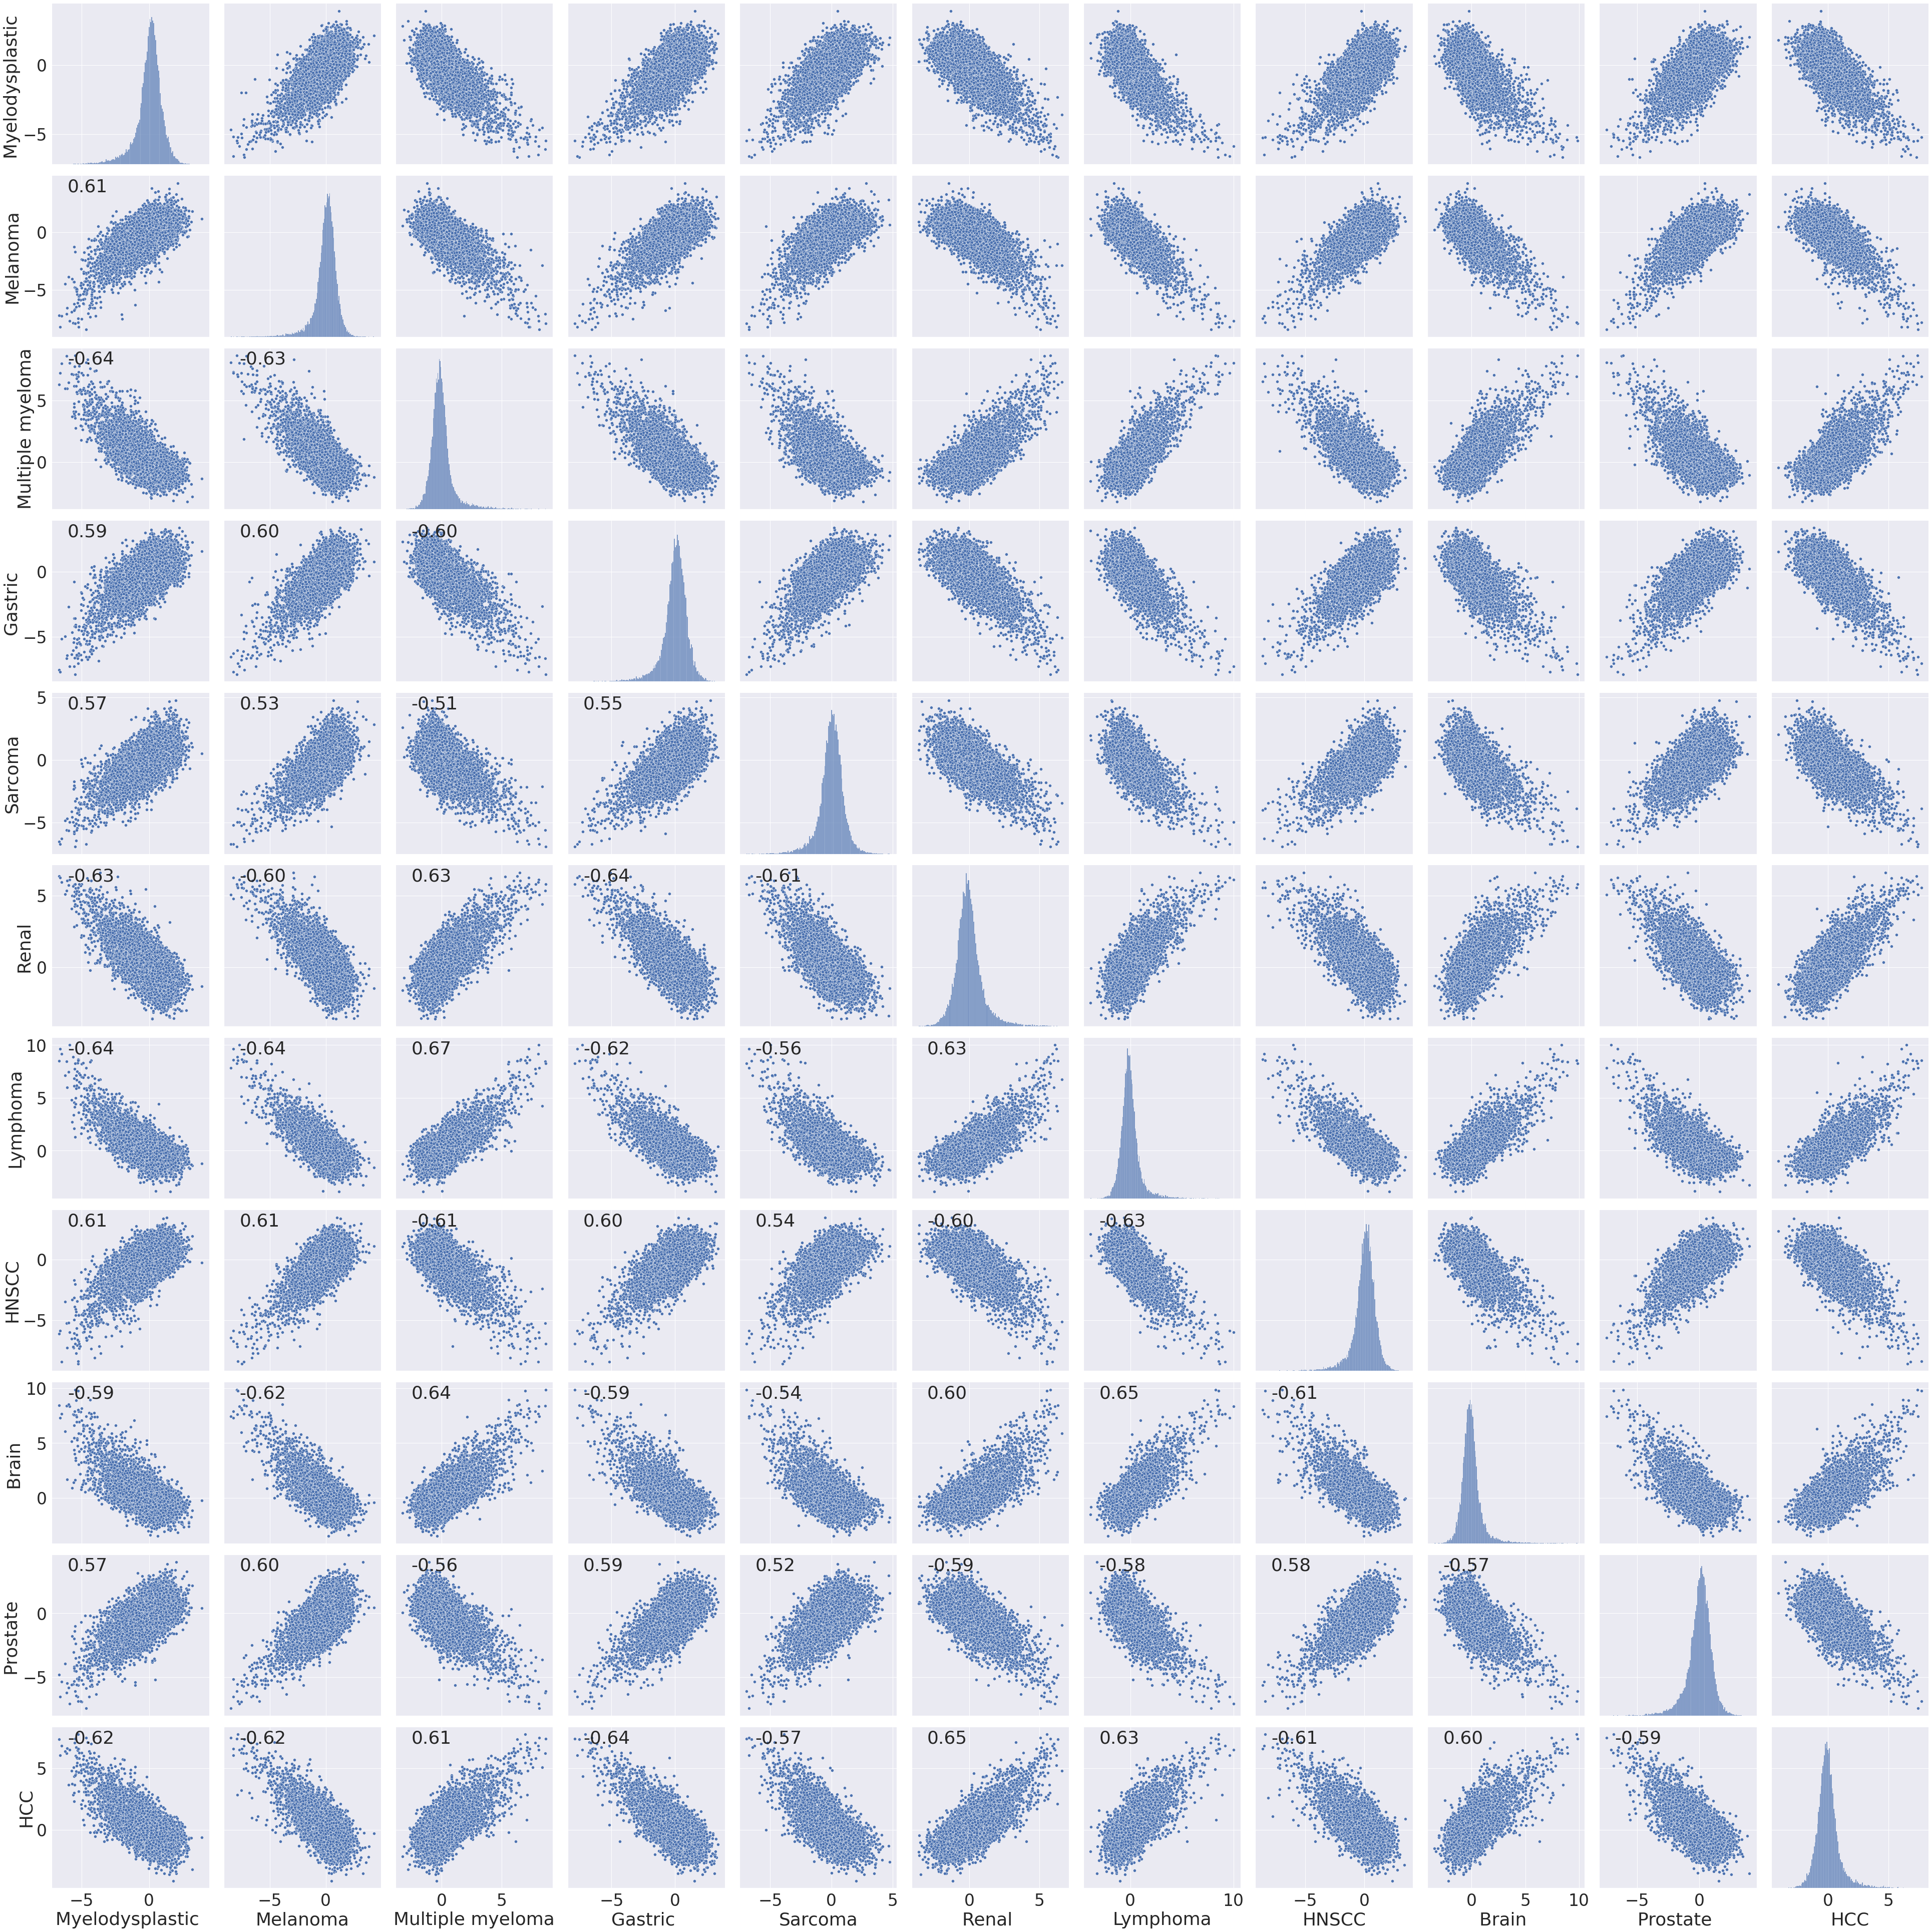

In [314]:
# Get the correlations to lymphoma
#cor_lymph = correlation['consensus independent component 105_Lymphoma']
#cluster = cor_lymph[cor_lymph > 0.4].index
cluster_df = df_full[b_int_components]
cluster_df.columns = [x.split('_', 1)[-1].replace('cancer','').replace('syndrome','') for x in cluster_df.columns]
sns.set(font_scale=3)
g = sns.pairplot(cluster_df, corner=False, height=5)
g.map_lower(corrfunc)
g.savefig(f'Results/Cancer_type/Correlation.png')

## Clear correlation

## Really low correaltion with the big dataset

In [208]:
# Columns that dont appear
all_groups = set([x.split('_')[1] for x in df_full.columns])
appearing = set([x.split('_')[1] for x in cluster])
not_appearing = all_groups.difference(appearing)
not_appearing

{'Adrenal cancer',
 'Breast cancer',
 'Colorectal cancer',
 'Leukemia',
 'Lung cancer',
 'Normal',
 'Ovarian cancer',
 'big'}

In [209]:
# Check the highest correlation with the big components
subset_cols =[x for x in correlation.columns if 'big' in x] 

for value in cluster:
    pearson_dist = correlation.loc[value, subset_cols].max()
    print(f"Pearson correlation between {value.split('_',1)[-1]} and big {pearson_dist}")


Pearson correlation between Myelodysplastic syndrome and big 0.07546749309446703
Pearson correlation between Melanoma and big 0.08092240440016533
Pearson correlation between Multiple myeloma and big 0.09269815168574548
Pearson correlation between Gastric cancer and big 0.07749393291391102
Pearson correlation between Sarcoma and big 0.0769307665566354
Pearson correlation between Renal cancer and big 0.06563345202385744
Pearson correlation between Lymphoma and big 0.07411593722710119
Pearson correlation between HNSCC and big 0.08159443465953081
Pearson correlation between Brain cancer and big 0.07192627178944364
Pearson correlation between Prostate cancer and big 0.07147136381730144
Pearson correlation between HCC and big 0.07743427922753499


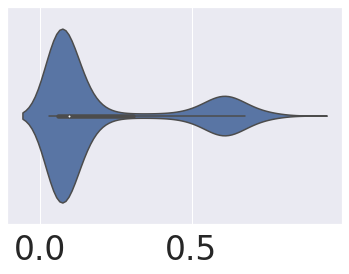

In [210]:
# What big components don't get recorrelated back
# TODO dit nog in consensus merged
index = [x for x in correlation.columns if x not in subset_cols]
values = correlation.loc[index, subset_cols].max().values
sns.violinplot(x=values)
plt.show()

## Size doesn't seem to be the difference

In [211]:
for var in not_appearing:
    subset_cols =[x for x in correlation.columns if var in x] 
    print(var)
    print(len(lookup_columns[var]))
    print(correlation.loc['consensus independent component 87_Adrenal cancer', subset_cols].max())

Leukemia
102
0.040303512757602356
Breast cancer
339
0.0401885058076523
Ovarian cancer
158
0.40062675828788086
big
3776
0.0550310593592862
Colorectal cancer
190
0.03540244058389026
Normal
605
0.032664547385924184
Lung cancer
193
0.05237822148812277
Adrenal cancer
113
1.0


In [212]:
# Load data
paths = [('GOBP', 'enrichment_matrix_Gene Ontology - Biolocal Processes.tsv'),
         ('HALLMARK', 'enrichment_matrix_Hallmark.tsv'),
         ('REACTOME','enrichment_matrix_Reactome.tsv')]
GSEA_ALL = {}
clean_cluster = []
mm = {}
for path in paths:
    first_run = True
    for value in cluster:
        component = value
        value = value.split('_',1)[-1].replace(' ', '_')
        try:
            df = pd.read_csv(f'/home/MarkF/DivideConquer8/Results/GPL570/{value}/GSEA/{path[1]}',
                             sep='\t', index_col=0)
            df.columns = [f"{x}_{value.replace('_', ' ')}" for x in df.columns]
            #df = df[component].abs()
            clean_cluster.append(component)
            df = df.abs()
            if first_run:
                GSEA = pd.DataFrame(df)
                first_run = False
            else:
                GSEA = GSEA.join(df)
        except FileNotFoundError:
            print(value)
        # Load mixing matrix
        
        mm[value] = pd.read_csv(f'/home/MarkF/DivideConquer/Results/GPL570/{value}/ICARUN/ica_mixing_matrix_consensus.tsv', 
                         sep='\t', index_col=0)[component.split('_')[0]]
    GSEA.index = [x.split(' -- ')[0].replace(f'{path[0]}_','') for x in GSEA.index]
    GSEA_ALL[path[0]] = GSEA
clean_cluster = list(set(clean_cluster))

# Hallmark geneset 

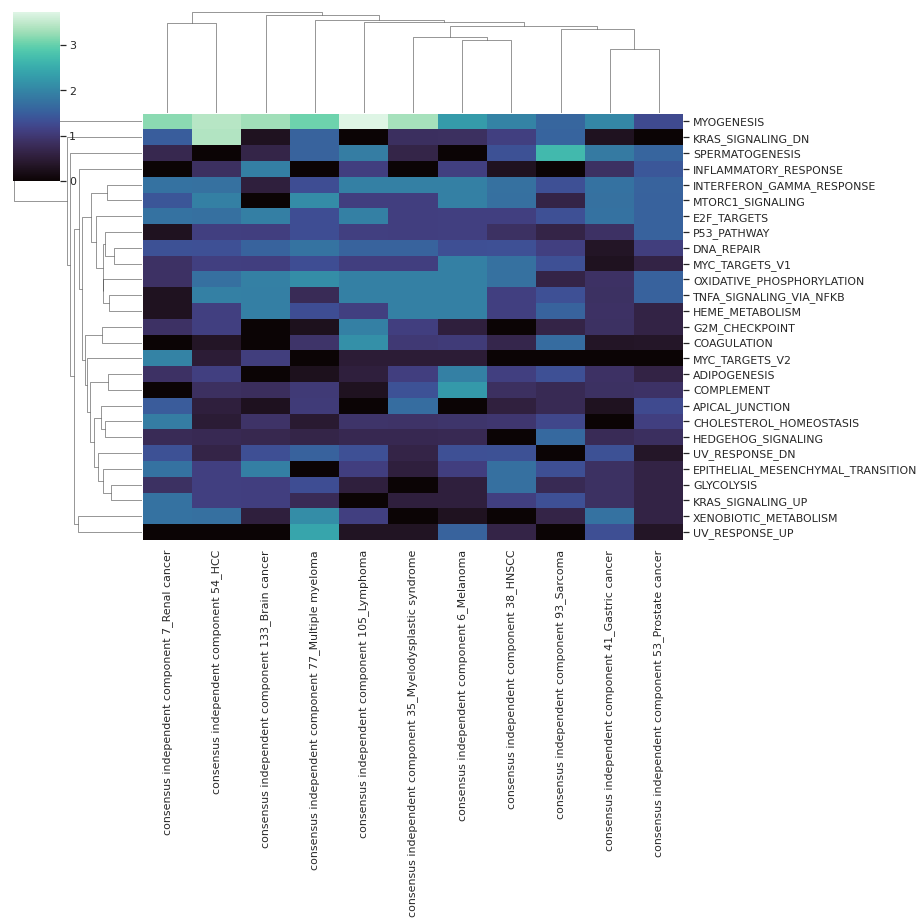

In [215]:
# Plot the values that have a higher value than 3 in a single column
cutoff = 1.5
plot_df = GSEA_ALL['HALLMARK'].loc[:,clean_cluster]
plot_df = plot_df[(plot_df > cutoff).any(axis=1)]
sns.set(font_scale=1)
sns.clustermap(plot_df, cmap="mako",figsize = (13,13))
#plt.savefig(f'Results/Cancer_type/HallMark.svg', dpi=1200)
plt.show()

# Go biological processes genesets

In [257]:
[x for x in GSEA_ALL['GOBP'].index if 'DNA_REPAIR' in x]

['DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR',
 'REGULATION_OF_DNA_REPAIR',
 'DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR',
 'NEGATIVE_REGULATION_OF_DNA_REPAIR',
 'POSITIVE_REGULATION_OF_DNA_REPAIR']

In [268]:
GSEA_ALL['GOBP'].loc[[x for x in GSEA_ALL['GOBP'].index if 'DNA_REPAIR' in x],clean_cluster]

consensus independent component 35_Myelodysplastic syndrome  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                          6.369943e-11             
REGULATION_OF_DNA_REPAIR                                                      6.895876e-01             
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                                       4.577898e-14             
NEGATIVE_REGULATION_OF_DNA_REPAIR                                             8.901576e-12             
POSITIVE_REGULATION_OF_DNA_REPAIR                                             9.114762e-01             

                                         consensus independent component 6_Melanoma  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                   0.000000e+00   
REGULATION_OF_DNA_REPAIR                                               1.391458e-16   
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                                1.391458e-16   
NEGATIVE_REGULATION_OF_DNA_REPAIR                                      0.000000e+00   
POSITIVE_REGULATION_OF_DNA_REPAIR                                      9.337561e-01   

                                         consensus independent component 93_Sarcoma  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                   1.391458e-16   
REGULATION_OF_DNA_REPAIR                                               1.007976e+00   
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                                1.391458e-16   
NEGATIVE_REGULATION_OF_DNA_REPAIR                                      0.000000e+00   
POSITIVE_REGULATION_OF_DNA_REPAIR                                      1.204637e+00   

                                         consensus independent component 77_Multiple myeloma  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                          4.830295e-01     
REGULATION_OF_DNA_REPAIR                                                      1.598887e+00     
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                                       3.047931e-07     
NEGATIVE_REGULATION_OF_DNA_REPAIR                                             1.463867e+00     
POSITIVE_REGULATION_OF_DNA_REPAIR                                             1.361044e+00     

                                         consensus independent component 133_Brain cancer  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                         1.619657e-13   
REGULATION_OF_DNA_REPAIR                                                     1.220156e-11   
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                                      1.391458e-16   
NEGATIVE_REGULATION_OF_DNA_REPAIR                                            1.349714e-14   
POSITIVE_REGULATION_OF_DNA_REPAIR                                            9.015663e-01   

                                         consensus independent component 7_Renal cancer  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                       5.568903e-01   
REGULATION_OF_DNA_REPAIR                                                   1.634568e+00   
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                                    1.391458e-16   
NEGATIVE_REGULATION_OF_DNA_REPAIR                                          8.149445e-01   
POSITIVE_REGULATION_OF_DNA_REPAIR                                          1.894149e+00   

                                         consensus independent component 38_HNSCC  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                 9.267808e-06   
REGULATION_OF_DNA_REPAIR                                             5.046180e-05   
DNA_DEALKYLATION_INVOLVED_IN_DNA_REPAIR                              3.026498e-07   
NEGATIVE_REGULATION_OF_DNA_REPAIR                                    3.551091e-06   
POSITIVE_REGULATION_OF_DNA_REPAIR                                    9.653558e-01   

                                         consensus independent component 41_Gastric cancer  \
DNA_SYNTHESIS_INVOLVED_IN_DNA_REPAIR                                              

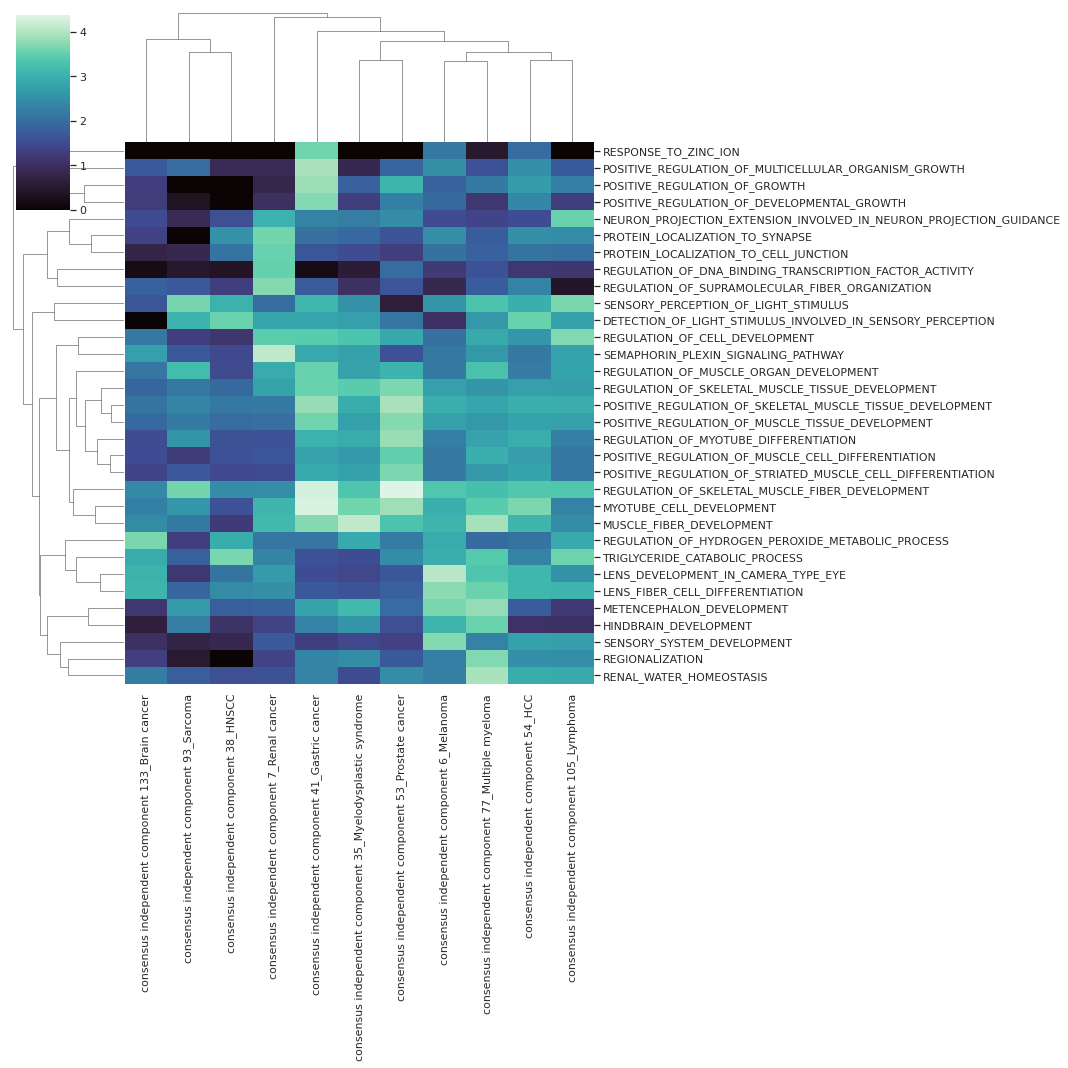

In [244]:
cutoff = 3.5
plot_df = GSEA_ALL['GOBP'].loc[:,clean_cluster]
plot_df = plot_df[(plot_df > cutoff).any(axis=1)]
sns.set(font_scale=1)
sns.clustermap(plot_df, cmap="mako",figsize = (15,15))
plt.savefig(f'Results/Cancer_type/GOBP.svg', dpi=1200)

# Reactome genesets

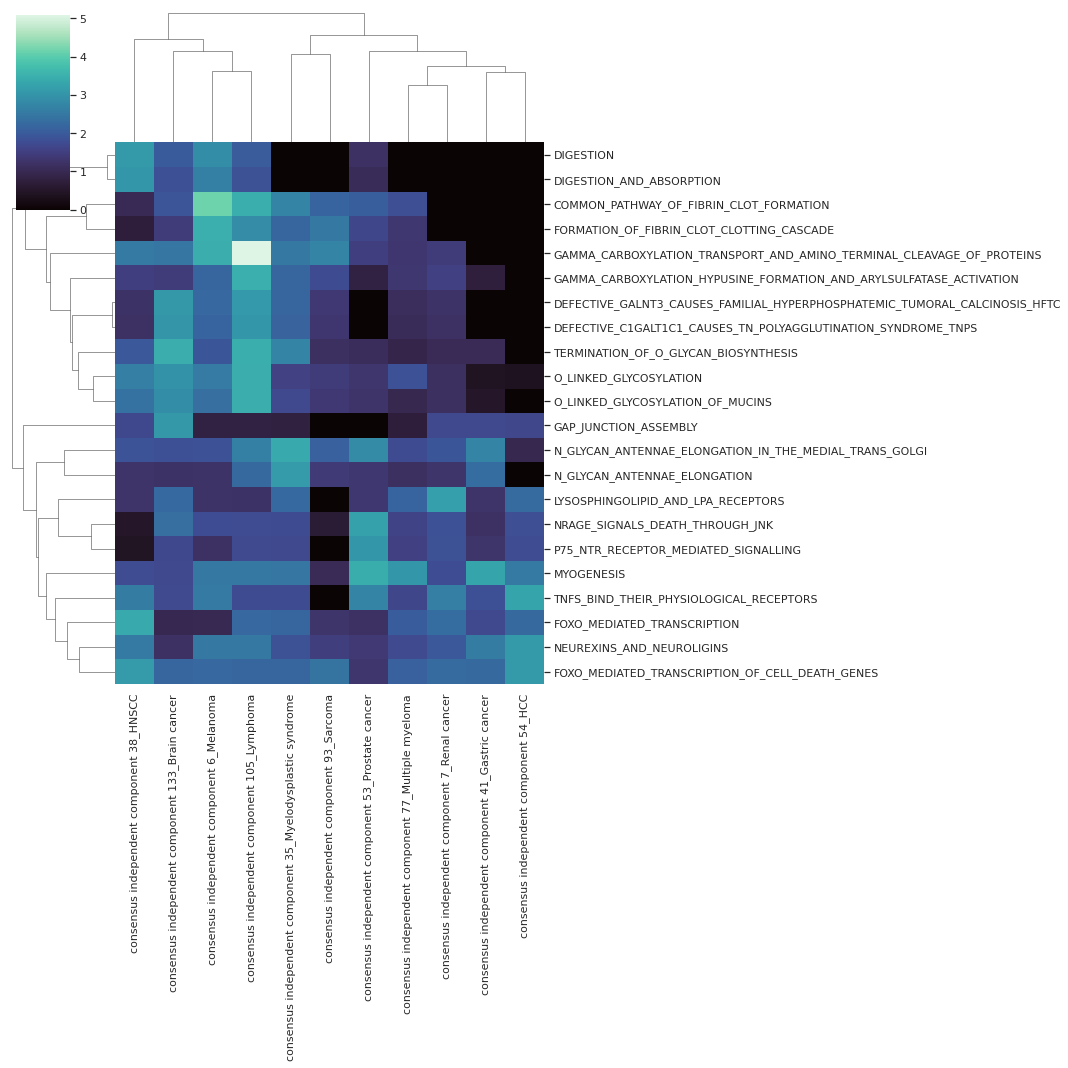

In [217]:
cutoff = 3
plot_df = GSEA_ALL['REACTOME'].loc[:,clean_cluster]
plot_df = plot_df[(plot_df > cutoff).any(axis=1)]
sns.set(font_scale=1)
sns.clustermap(plot_df, cmap="mako",figsize = (15,15))
plt.savefig(f'Results/Cancer_type/Reactome.svg', dpi=1200)

# Get the themes

In [339]:
dna_df = pd.read_excel('/home/MarkF/DivideConquer/Tacna_confic/GOBP_REACTOME_RELEVANT_GENESETS.xlsx',
                                    header=None)[0]
immune_df = pd.read_csv(
    '/home/MarkF/DivideConquer/Tacna_confic/gobp_immune_gene_sets_manualselection_updated.tsv', sep='\t')
immune_df = immune_df[immune_df['is_immune_process'] == True]['gene_set_name']

metabolic = pd.read_csv('/home/MarkF/DivideConquer/Tacna_confic/metabolic_gene_sets.txt', sep='\t')[
    'GO_NUCLEOBASE_METABOLIC_PROCESS']
metabolic = metabolic.str.replace('GO', 'GOBP')

In [362]:
import sys
# TODO What is the number of tests?
# Bonferroni correction
test_df = GSEA_ALL['GOBP'][cluster]
test_df = (test_df > 3).T
# See of any value in the row is still significant (So higher than corrected value) and only keep those
test_df = test_df[test_df.sum(axis=1) > 0]
# Loop over the significant rows and get those column names (The names of the components)
significant_components = {}
for index, row in test_df.iterrows():
    significant_components[index] = {
                        'is_immune_process': 0,
                        'is_metabolic_process': 0,
                        'is_DNA_Repair': 0,
                    }
    for geneset in list(row[row == True].index):
        geneset = f'GOBP_{geneset}'
        if geneset in dna_df.values: 
            significant_components[index]['is_DNA_Repair'] += 1
        if geneset in immune_df.values: 
            significant_components[index]['is_immune_process'] += 1
        if geneset in metabolic.values: 
            significant_components[index]['is_metabolic_process'] += 1
    
print(significant_components)


{'consensus independent component 35_Myelodysplastic syndrome': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 0}, 'consensus independent component 6_Melanoma': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 0}, 'consensus independent component 77_Multiple myeloma': {'is_immune_process': 0, 'is_metabolic_process': 1, 'is_DNA_Repair': 0}, 'consensus independent component 41_Gastric cancer': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 0}, 'consensus independent component 93_Sarcoma': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 0}, 'consensus independent component 7_Renal cancer': {'is_immune_process': 2, 'is_metabolic_process': 0, 'is_DNA_Repair': 1}, 'consensus independent component 105_Lymphoma': {'is_immune_process': 0, 'is_metabolic_process': 1, 'is_DNA_Repair': 0}, 'consensus independent component 38_HNSCC': {'is_immune_process': 2, 'is_metabolic_process': 2, 'is_DNA_Repair': 0}, 'consensus

# With permutation (No conclusion)

In [218]:
# Load the summary
df = pd.read_csv('/home/MarkF/DivideConquer/Results/GPL570/Lymphoma/GSEA_Permutation'
                          '/enrichment_summary.tsv', sep='\t', index_col=0)
df.index = [f'{x} Lymphoma' for x in df.index]
df1 = pd.read_csv('/home/MarkF/DivideConquer/Results/GPL570/Multiple_myeloma/GSEA_Permutation'
                          '/enrichment_summary.tsv', sep='\t', index_col=0)
df1.index = [f'{x} Myeloma' for x in df1.index]

# Merge the gene set enrichment scores and only leave the 2 needed components
merged_1 = pd.concat([df, df1])
merged_1 = merged_1.loc[['consensus independent component 105 Lymphoma', 'consensus independent component 77 Myeloma'],:]



In [219]:
merged_1

Reactome  \
consensus independent component 105 Lymphoma  5.077589   
consensus independent component 77 Myeloma    3.049009   

                                              absolute mvp threshold (FDR = 0.05, CL = 0.8)  \
consensus independent component 105 Lymphoma                                       3.459879   
consensus independent component 77 Myeloma                                         3.459278   

                                              N above mvp threshold  \
consensus independent component 105 Lymphoma                      4   
consensus independent component 77 Myeloma                        0   

                                              Gene Ontology - Biolocal Processes  \
consensus independent component 105 Lymphoma                            3.702324   
consensus independent component 77 Myeloma                              3.954428   

                                              absolute mvp threshold (FDR = 0.05, CL = 0.8).1  \
consensus independent component 105 Lymphoma                                         3.857531   
consensus independent component 77 Myeloma                                           3.735202   

                                              N above mvp threshold.1  \
consensus independent component 105 Lymphoma                        0   
consensus independent component 77 Myeloma                          3   

                                              Hallmark  \
consensus independent component 105 Lymphoma  3.707581   
consensus independent component 77 Myeloma    3.035487   

                                              absolute mvp threshold (FDR = 0.05, CL = 0.8).2  \
consensus independent component 105 Lymphoma                                         2.664433   
consensus independent component 77 Myeloma                                           2.733580   

                                              N above mvp threshold.2  
consensus independent component 105 Lymphoma                        1  
consensus independent component 77 Myeloma                          1

In [220]:
clean_cluster

['consensus independent component 35_Myelodysplastic syndrome',
 'consensus independent component 6_Melanoma',
 'consensus independent component 93_Sarcoma',
 'consensus independent component 77_Multiple myeloma',
 'consensus independent component 133_Brain cancer',
 'consensus independent component 7_Renal cancer',
 'consensus independent component 38_HNSCC',
 'consensus independent component 41_Gastric cancer',
 'consensus independent component 53_Prostate cancer',
 'consensus independent component 54_HCC',
 'consensus independent component 105_Lymphoma']

In [221]:
GSEA_ALL['HALLMARK'][GSEA_ALL['HALLMARK']['consensus independent component 105_Lymphoma'] >= 2.664433][clean_cluster]

consensus independent component 35_Myelodysplastic syndrome  \
MYOGENESIS                                           3.324318             

            consensus independent component 6_Melanoma  \
MYOGENESIS                                    2.277331   

            consensus independent component 93_Sarcoma  \
MYOGENESIS                                    1.602723   

            consensus independent component 77_Multiple myeloma  \
MYOGENESIS                                           3.035487     

            consensus independent component 133_Brain cancer  \
MYOGENESIS                                          3.298436   

            consensus independent component 7_Renal cancer  \
MYOGENESIS                                        3.186175   

            consensus independent component 38_HNSCC  \
MYOGENESIS                                  1.962155   

            consensus independent component 41_Gastric cancer  \
MYOGENESIS                                           2.024846   

            consensus independent component 53_Prostate cancer  \
MYOGENESIS                                           1.249932    

            consensus independent component 54_HCC  \
MYOGENESIS                                3.428201   

            consensus independent component 105_Lymphoma  
MYOGENESIS                                      3.707581

In [222]:
GSEA_ALL['HALLMARK'].loc['MYOGENESIS', :].sort_values(ascending=False).head(10)

consensus independent component 117_HNSCC             18.610363
consensus independent component 76_Prostate cancer    15.992523
consensus independent component 131_Lymphoma          15.845365
consensus independent component 73_Prostate cancer    15.640400
consensus independent component 320_Sarcoma           14.981886
consensus independent component 322_Sarcoma           14.968251
consensus independent component 129_Melanoma          14.623190
consensus independent component 102_Lymphoma          13.744003
consensus independent component 87_Prostate cancer    13.725825
consensus independent component 10_HNSCC              13.003829
Name: MYOGENESIS, dtype: float64

In [223]:
with open('/home/MarkF/DivideConquer/Tacna_confic/entrezid/Reactome.txt') as f:
    lines = f.readlines()
    
interesting_genes = [x.replace('\n', '').split('\t') for x in lines if 'REACTOME_TERMINATION_OF_O_GLYCAN_BIOSYNTHESIS' in x]
interesting_genes = interesting_genes[0][2:]
interesting_genes = [int(x) for x in interesting_genes if int(x) in df_full.index]


# Gene perspective
## all genes

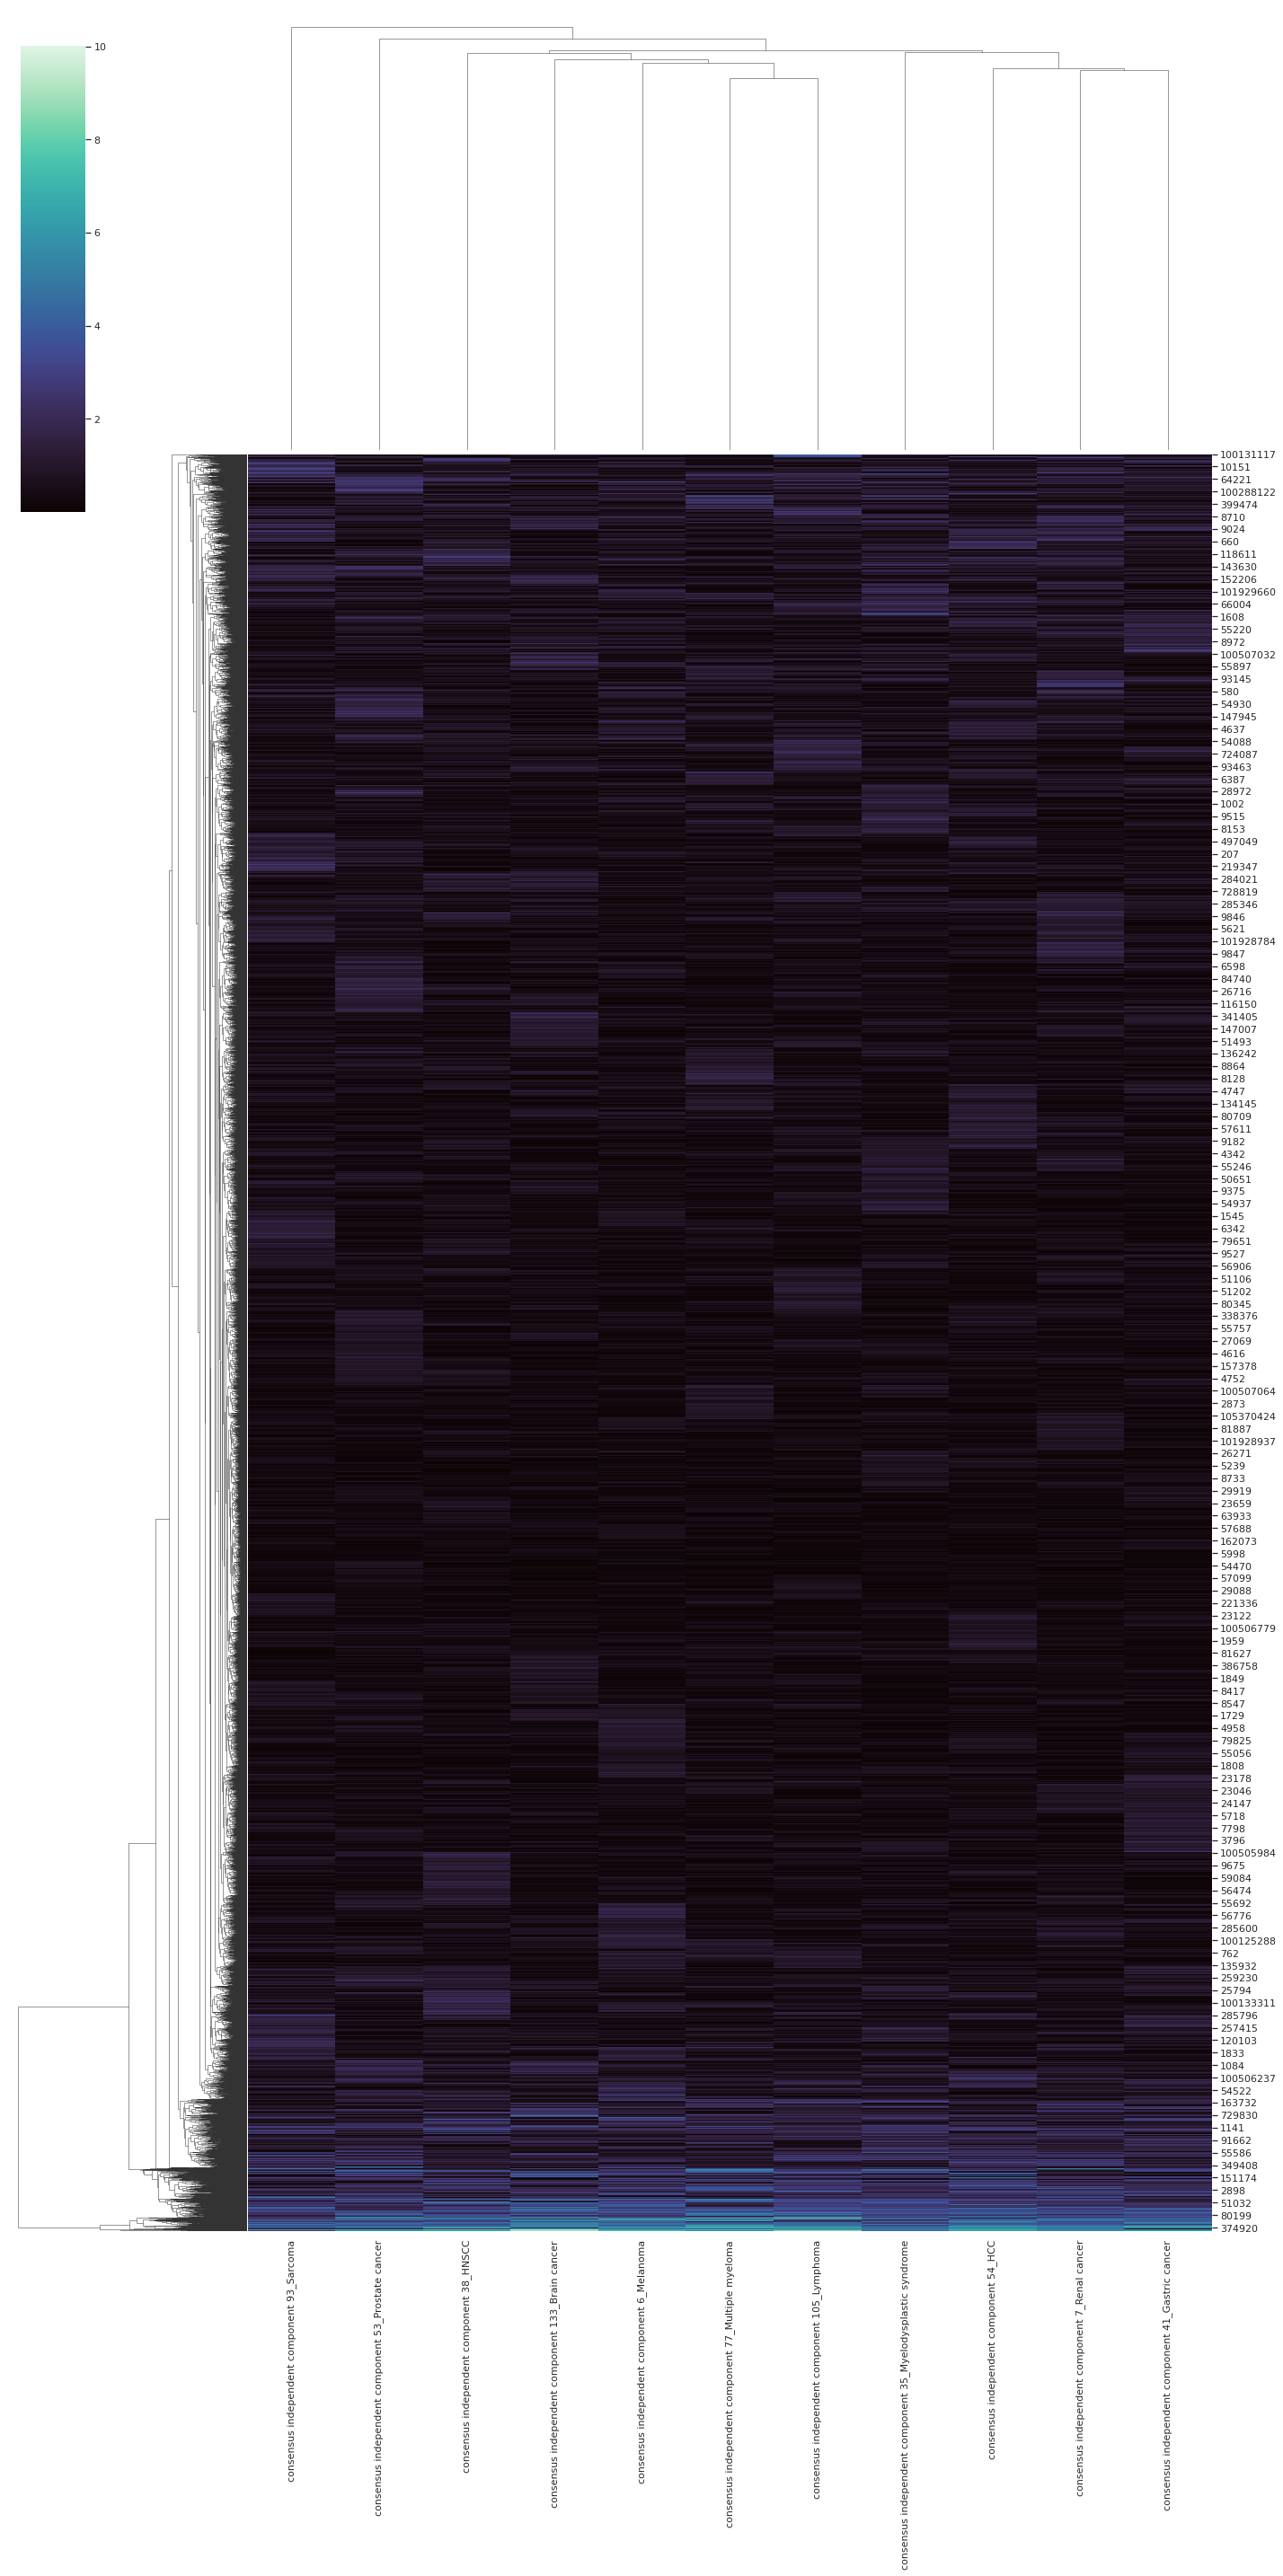

In [23]:
plot_df = df_full[cluster].abs()
sns.set(font_scale=1)
#plot_df = plot_df[(plot_df > 4).any(axis=1)]
sns.clustermap(plot_df, cmap='mako',
               figsize = (20,40))
plt.show()

## Only the genes that have a value higher than 5 in any component

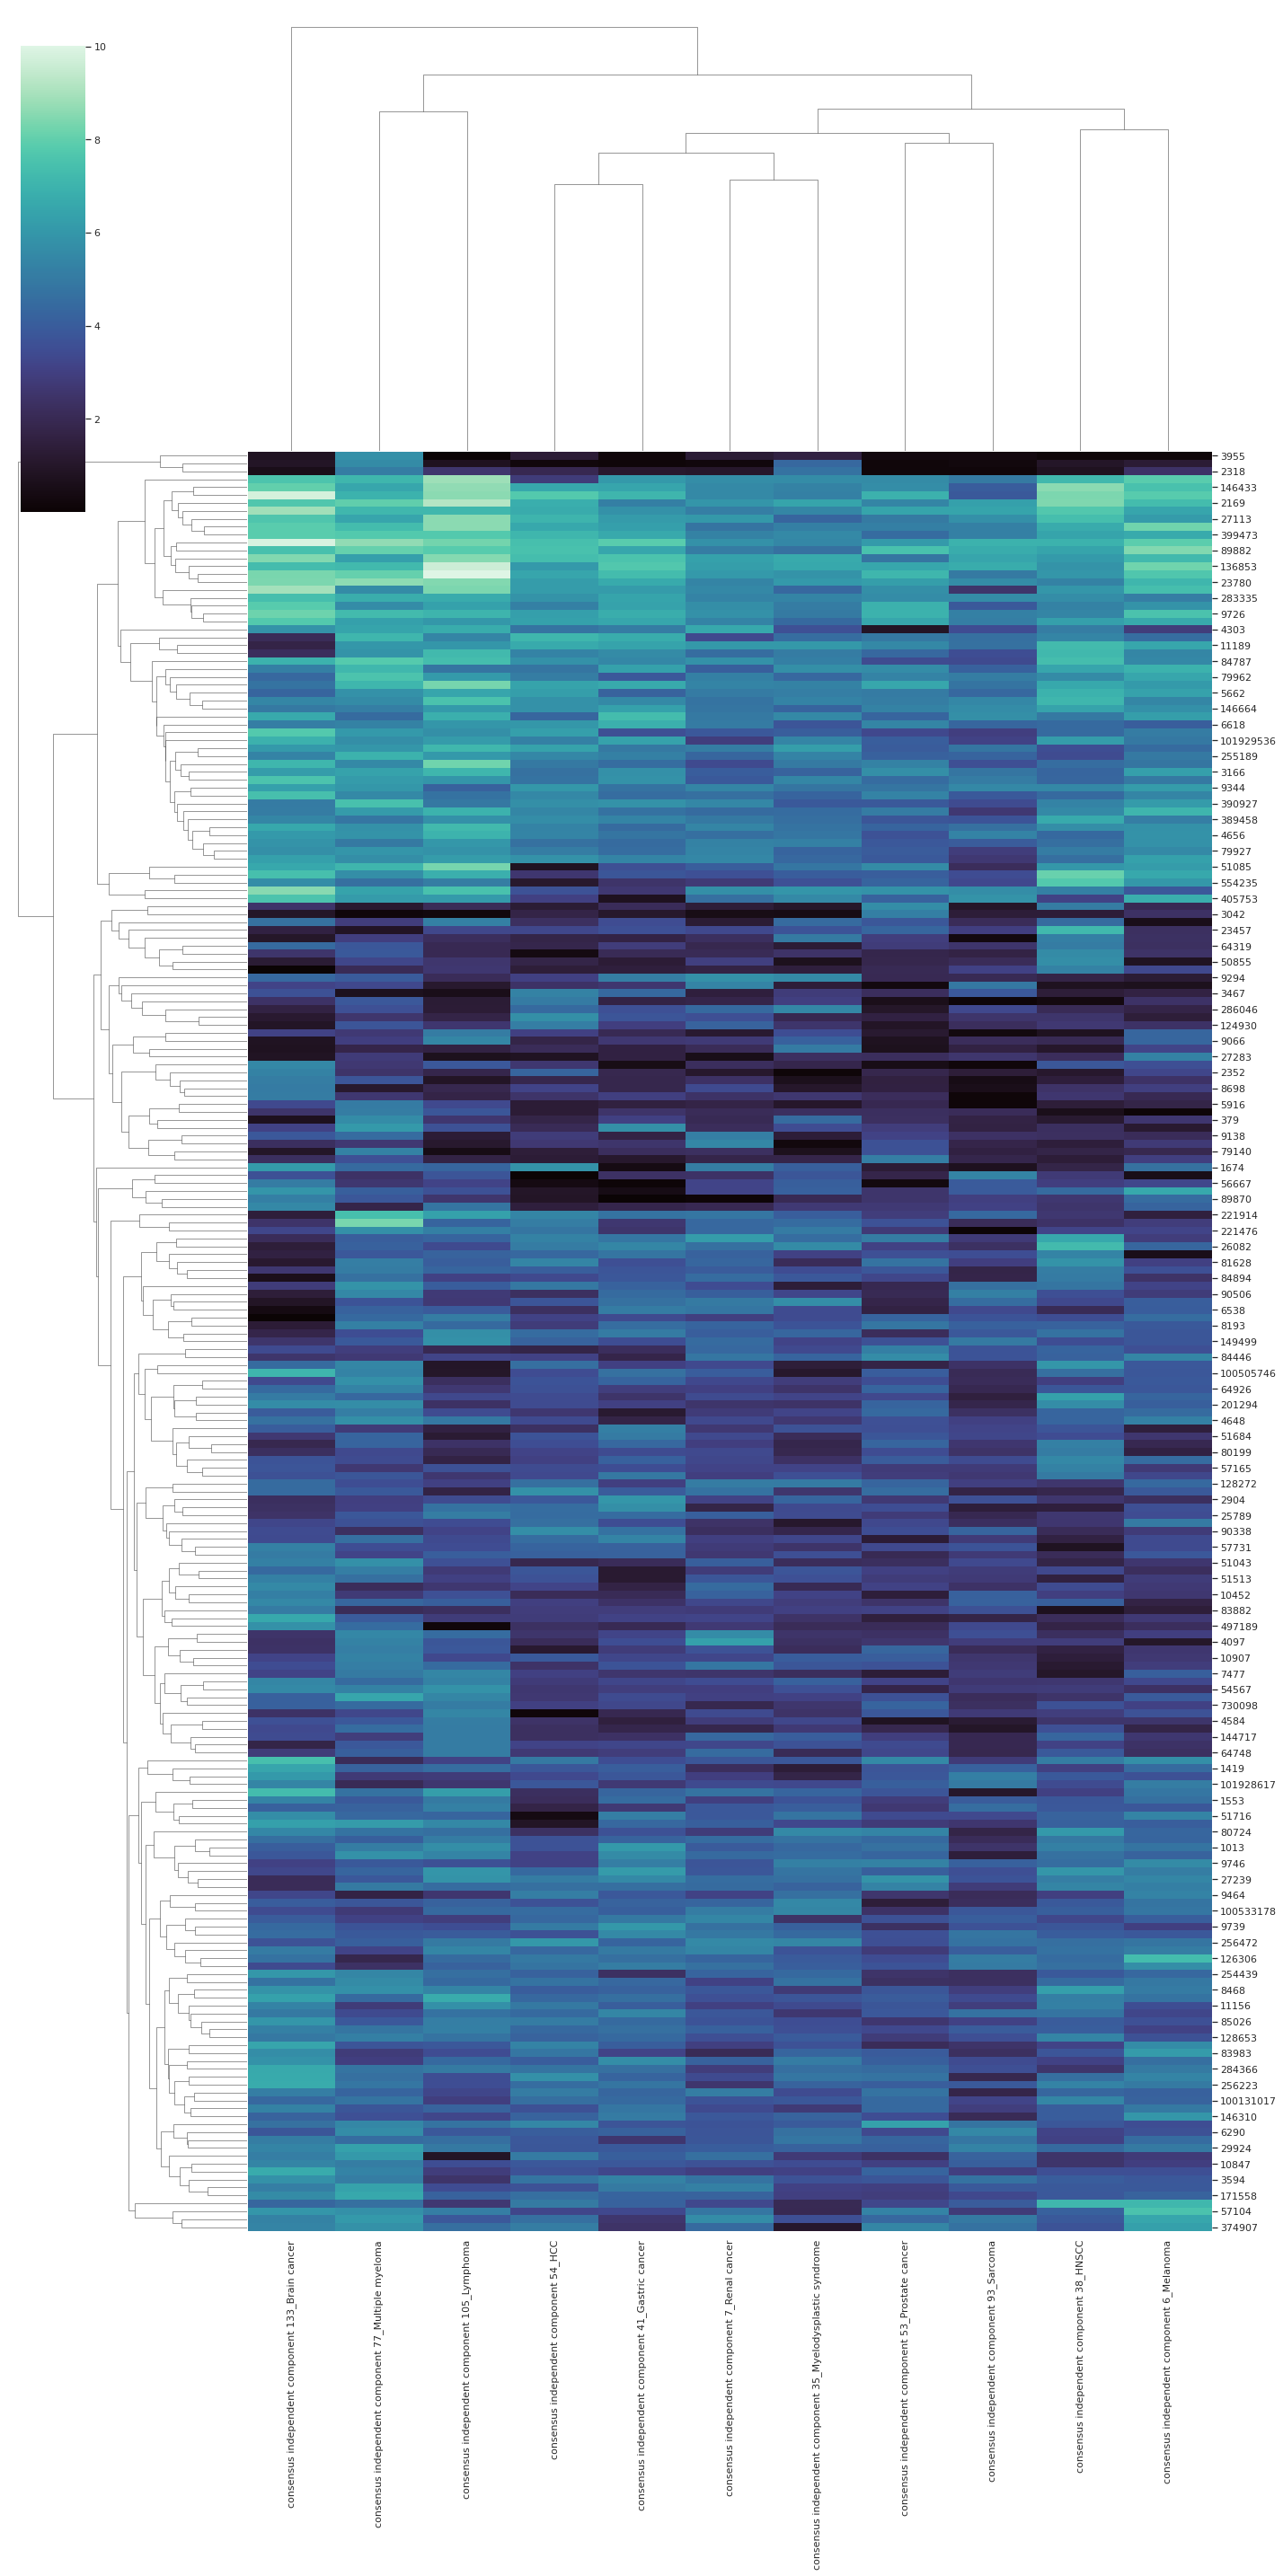

In [24]:
plot_df = df_full[cluster].abs()
plot_df = plot_df[(plot_df > 5).any(axis=1)]
sns.clustermap(plot_df, cmap='mako',
               figsize = (20,40))
plt.show()

## Only the genes that have a value higher than 8 in any component

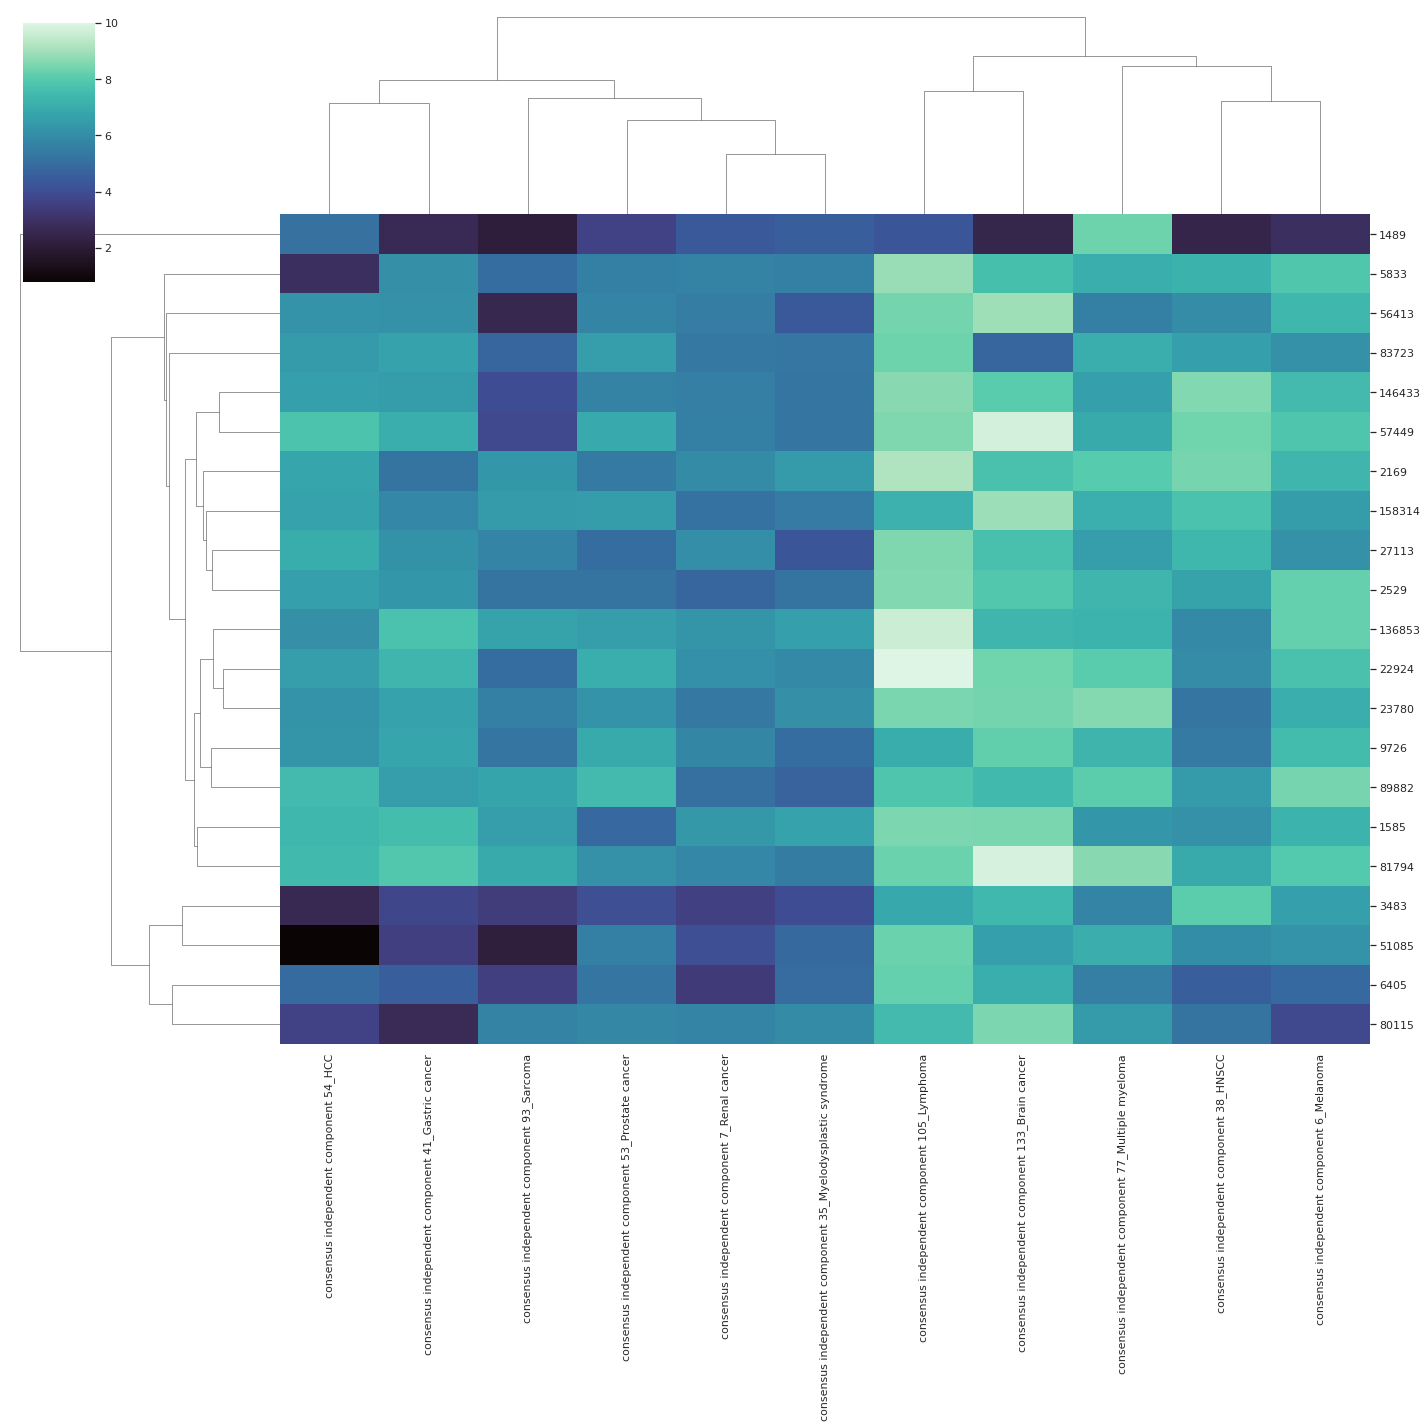

In [25]:
plot_df = df_full[cluster].abs()
plot_df = plot_df[(plot_df > 8).any(axis=1)]
sns.clustermap(plot_df, cmap='mako',
               figsize = (20,20))
plt.show()

## Only the genes that have a value higher than 4 in all components

In [26]:
# Plot the values that have a higher value than 4 in all columns
cutoff = 4
plot_df = plot_df.abs()
plot_df[(plot_df > cutoff).all(axis=1)]

consensus independent component 38_HNSCC  \
22924                                   5.977125   
9726                                    5.376807   
2169                                    8.441403   
27113                                   7.354328   
1585                                    6.131707   
2529                                    6.718014   
23780                                   5.256809   
83723                                   6.598127   
81794                                   6.930934   
158314                                  7.728730   
136853                                  5.871998   
146433                                  8.583428   
89882                                   6.456890   

        consensus independent component 77_Multiple myeloma  \
22924                                            8.057704     
9726                                             7.237808     
2169                                             7.997254     
27113                                            6.526330     
1585                                             6.282401     
2529                                             7.298704     
23780                                            8.606376     
83723                                            7.076917     
81794                                            8.643039     
158314                                           7.116818     
136853                                           7.231644     
146433                                           6.557501     
89882                                            8.079375     

        consensus independent component 6_Melanoma  \
22924                                     7.697607   
9726                                      7.517148   
2169                                      7.291271   
27113                                     6.141497   
1585                                      7.228761   
2529                                      8.225046   
23780                                     7.086047   
83723                                     6.127787   
81794                                     7.923632   
158314                                    6.503776   
136853                                    8.230580   
146433                                    7.474200   
89882                                     8.450524   

        consensus independent component 105_Lymphoma  \
22924                                      10.005387   
9726                                        7.009814   
2169                                        9.189986   
27113                                       8.566449   
1585                                        8.499117   
2529                                        8.577872   
23780                                       8.462717   
83723                                       8.320892   
81794                                       8.282127   
158314                                      7.144160   
136853                                      9.643772   
146433                                      8.664262   
89882                                       7.819709   

        consensus independent component 54_HCC  \
22924                                 6.520743   
9726                                  6.261898   
2169                                  6.832632   
27113                                 7.008859   
1585                                  7.347564   
2529                                  6.597347   
23780                                 6.209005   
83723                                 6.447987   
81794                                 7.416463   
158314                                6.694598   
136853                                6.076226   
146433                                6.574294   
89882                                 7.469276   

        consensus independent component 7_Renal cancer  \
22924                                         6.097081   
9726                                 

# CNA results

In [27]:
df_full[cluster].to_csv('/home/MarkF/DivideConquer/ICA/Results/CNA.tsv', sep='\t')

In [ ]:
df = pd.read_csv('/home/MarkF/DivideConquer/ICA/Results/CNA'
                 '/_extreme_valued_regions_all_chromosomes.txt', sep='\t')
df = df[df['extreme_value_region_status'] != 0]
df = df[df['mappings_in_region'] >= 10]

In [29]:
df

Empty DataFrame
Columns: [chrom, chromStart, chromEnd, name, extreme_value_region_status, mappings_in_region, hyperparameter]
Index: []

# Guilt by association

In [226]:
names = pd.read_csv('/home/MarkF/DivideConquer/Tacna_confic/Genomic_Mapping_hgu133plus2_using_jetscore_30032018.txt',
           sep=None, engine='python')
names = names.groupby('SYMBOL').first().reset_index().set_index('ENTREZID')['SYMBOL']

In [227]:
# Top 100 genes for every component
plot_df = df_full[cluster].abs()
plot_df = plot_df.join(names)
for name in cluster:
    print(name.split('_')[1])
    print(' '.join(list(plot_df.sort_values(name, ascending=False).head(100)['SYMBOL'])))
    print('_________________________________________________________________________________________')

Myelodysplastic syndrome
CYP11B2 SSC4D FABP2 MYL10 APOL2 CELF3 BAIAP2L2 MAPRE3 KCNC3 SSTR2 PCYT2 DKFZP434L187 ZSWIM4 S1PR2 DUOXA2 ACAD10 SPRED3 TRPV6 ADAMTS10 XKR6 PRORY TMEM151A LINC00475 LOC105369921 LOC101929536 LOC283335 IQCC PLA2G4F FAM57B IL34 PLEKHG5 C19orf68 CLSTN3 FUT7 KMT5C PSD RCOR2 LINC01023 BCL2 ARL3 PI16 ARHGEF19 ZNF646 SLC7A10 SEMA3F PLXNA4 MLXIPL GFER MYOG IL17RE HS6ST3 TAOK2 FOXJ1 CES1P1 ADAM11 NOX5 TMEM63A EVX1 LINC00482 FLNC EPB41L4B HHLA1 TPD52L3 SAA3P RPUSD1 GPR162 HAND2 RBAKDN KLK9 SNPH GNAT1 CADM4 LONP2 CTF1 ZNF205 NPFFR1 NAPSA CAPS CRX HSD17B14 ST3GAL4 ARL4D DOHH TIGD5 ATAD3C TCF15 UNK KIFC3 CCDC8 C11orf86 CES4A RBBP8NL LTB4R2 DNAJC22 CDH15 BGN TEX11 SSTR3 GGT7 KCTD17
_________________________________________________________________________________________
Melanoma
TPD52L3 SSC4D FUT7 ADAMTS10 PCYT2 PLEKHG5 MAPRE3 PNPLA2 ZNF646 IL34 LTB4R2 FABP2 JSRP1 CYP11B2 L1TD1 APOL2 CAPS KCNC3 DUOXA2 SPRED3 TCF15 APOA4 IGFALS CELF3 DNAJC22 RCE1 LINC00475 PSD RBBP8NL B3GNT8 H

In [461]:
# IMport results
import os
first_run = True
for entry in os.scandir('/home/MarkF/DivideConquer/Results/Genetica'):
    if '.svg' not in entry.path:
        df = pd.read_csv(entry.path, index_col=0)
        df = df.groupby('gene_set').mean().sort_values(by='value', ascending=False)
        df.columns = [f'Score_{entry.path.split("/")[-1]}']
        df.index = [x.replace('GO_', '') for x in df.index]
        if first_run:
            gba = df
            first_run = False
        else:
            gba = gba.join(df, how='outer')


In [462]:
import sys
# Get the function
test_df = gba
test_df = (test_df > 5).T
# See of any value in the row is still significant (So higher than corrected value) and only keep those
test_df = test_df[test_df.sum(axis=1) > 0]
# Loop over the significant rows and get those column names (The names of the components)
significant_components = {}
for index, row in test_df.iterrows():
    significant_components[index] = {
                        'is_immune_process': 0,
                        'is_metabolic_process': 0,
                        'is_DNA_Repair': 0,
                    }
    for geneset in list(row[row == True].index):
        geneset = f'GOBP_{geneset}'
        if geneset in dna_df.values: 
            significant_components[index]['is_DNA_Repair'] = significant_components[index]['is_DNA_Repair'] + 1
        if geneset in immune_df.values: 
            significant_components[index]['is_immune_process'] += 1
        if geneset in metabolic.values: 
            significant_components[index]['is_metabolic_process'] += 1
    
print(significant_components)


{'Score_Sarcoma': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 5}, 'Score_Mutiple_myeloma': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 2}, 'Score_Prostate_cancer': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 2}, 'Score_Renal_cancer': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 1}, 'Score_HCC': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 2}, 'Score_Gastric _cancer': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 2}, 'Score_Lymphoma': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 1}, 'Score_Myelodysplastic_syndrome': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 4}, 'Score_Brain_cancer': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 1}, 'Score_Melanoma': {'is_immune_process': 0, 'is_metabolic_process': 0, 'is_DNA_Repair': 5}, 'Score_HNSCC': {'is_immune_process': 1, 'is_metabo

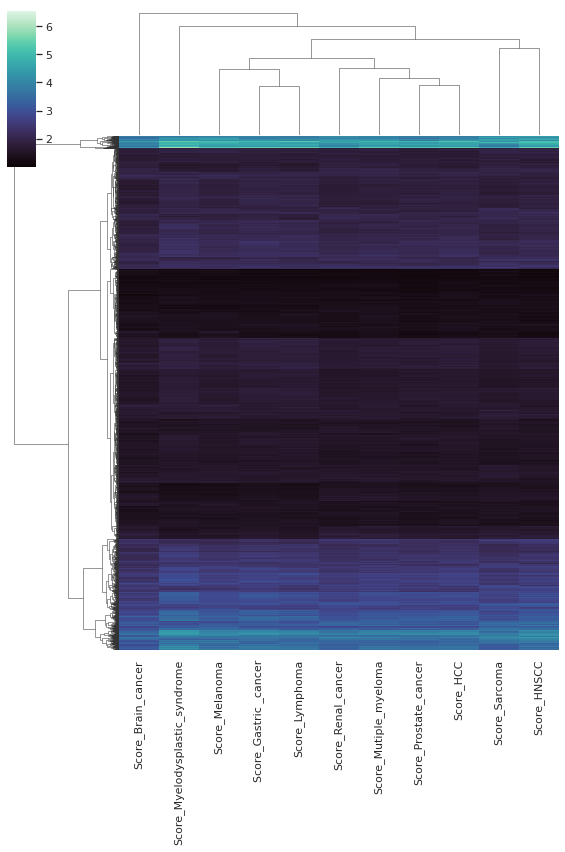

In [463]:
sns.set(font_scale=1)
g = sns.clustermap(gba, cmap='mako',
               figsize = (8,12), yticklabels=False)
#plt.show()
plt.savefig(f'Results/Cancer_type/ClusterMapGuildByAssociation.png', dpi=1200)

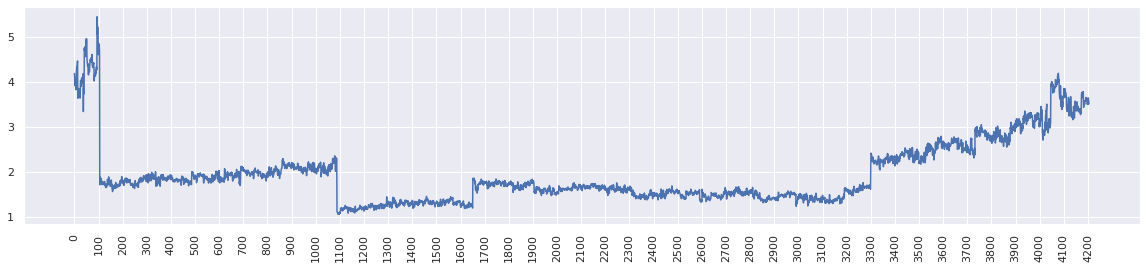

In [464]:
bot_subset_gba = gba.iloc[g.dendrogram_row.reordered_ind,g.dendrogram_col.reordered_ind]
plt.figure(figsize = (20, 4))
plt.plot(np.arange(0,len(bot_subset_gba)), bot_subset_gba['Score_Prostate_cancer'])
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(bot_subset_gba), step=100))
plt.show()

In [465]:
bot_subset_gba = gba.iloc[g.dendrogram_row.reordered_ind,g.dendrogram_col.reordered_ind].tail(905)
bot_subset_gba = bot_subset_gba.mean(axis=1)

In [466]:
top_subset_gba = gba.iloc[g.dendrogram_row.reordered_ind,g.dendrogram_col.reordered_ind].head(105)
top_subset_gba = top_subset_gba.mean(axis=1)

In [467]:
color_to_words =  {
    'lightblue': list(top_subset_gba.index), 
    'purple': list(bot_subset_gba.index)
}

from wordcloud import WordCloud, get_single_color_func

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


mean_gba = gba.mean(axis=1)


# Since the text is small collocations are turned off and text is lower-cased
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white', min_font_size=0).generate_from_frequencies(mean_gba)


# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wordcloud.recolor(color_func=grouped_color_func)

# # Plot
# plt.figure(figsize = (16, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.show()

In [468]:


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    #color = sns.color_palette("tab10")[np.random.randint(0,10)]
    color = sns.color_palette("icefire", as_cmap=False)[np.random.randint(0,6)]
    color = np.array(color) * 255
    color = color.astype(int)
    return f"rgb({color[0]}, {color[1]}, {color[2]})"

def wordmap(df, name):
    wordcloud = WordCloud(width = 2000, height = 2000,
                    background_color ='white', min_font_size=0).generate_from_frequencies(df)
    wordcloud.recolor(color_func=grey_color_func)
    # Plot
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig(f'Results/Cancer_type/WordMap_{name}.svg', dpi=1200)


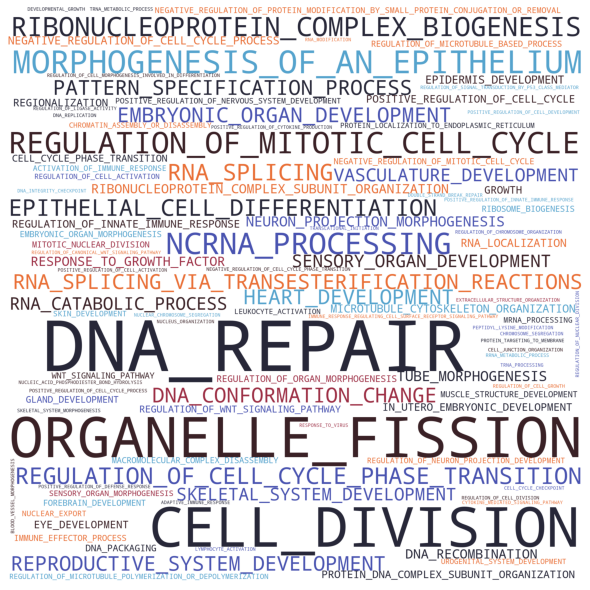

In [469]:
wordmap(top_subset_gba, 'top')

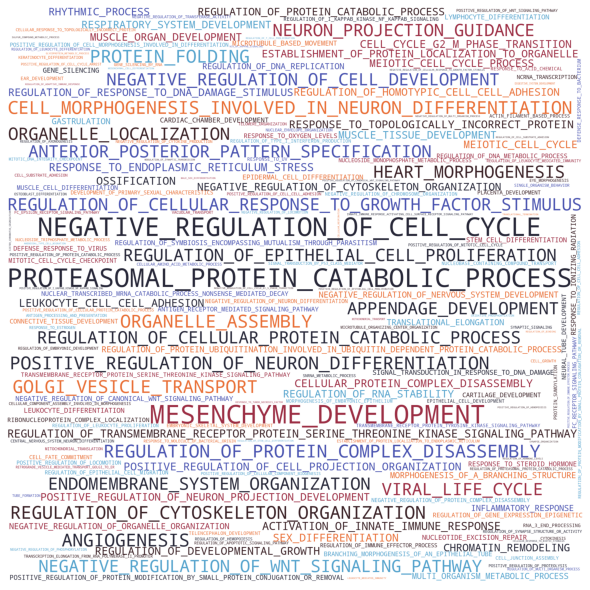

In [470]:
wordmap(bot_subset_gba, 'bot')

# Explained variance

In [364]:
df_full[cluster]

consensus independent component 35_Myelodysplastic syndrome  \
2597                                            -0.521883             
60                                               0.593254             
780                                              0.741314             
3310                                            -0.308419             
2978                                            -0.648835             
...                                                   ...             
338579                                          -0.596981             
417                                              1.141359             
83734                                            1.233476             
400759                                           0.536829             
9512                                            -0.933466             

        consensus independent component 6_Melanoma  \
2597                                      0.915773   
60                                        0.203284   
780                                       0.302433   
3310                                      0.543804   
2978                                      0.844072   
...                                            ...   
338579                                    0.114026   
417                                       0.628182   
83734                                     1.183806   
400759                                    1.026501   
9512                                      0.353802   

        consensus independent component 77_Multiple myeloma  \
2597                                             0.306823     
60                                               0.129984     
780                                             -0.639859     
3310                                            -1.003551     
2978                                             0.793133     
...                                                   ...     
338579                                          -0.912749     
417                                             -0.562478     
83734                                            0.106733     
400759                                          -0.444693     
9512                                            -0.071501     

        consensus independent component 41_Gastric cancer  \
2597                                            -0.783208   
60                                              -0.336057   
780                                              0.300630   
3310                                            -0.445621   
2978                                             1.461116   
...                                                   ...   
338579                                           0.069958   
417                                              1.045855   
83734                                           -0.957609   
400759                                           0.362536   
9512                                             0.430087   

        consensus independent component 93_Sarcoma  \
2597                                     -0.322636   
60                                        0.930162   
780                                       0.652283   
3310                                     -0.389577   
2978                                     -0.261878   
...                                            ...   
338579                                   -0.895176   
417                                       0.351032   
83734                                    -0.697746   
400759                                   -1.037984   
9512                                      0.043355   

        consensus independent component 7_Renal cancer  \
2597                                          0.041036   
60                                           -0.148775   
780                                          -0.664165   
3310                                         -0.420713   
2978                                         -0.030493   
...                

In [454]:
mm = pd.DataFrame()
for entry in os.scandir('/home/MarkF/DivideConquer/Results/GPL570'):
    if 'All_Cancer' not in entry.path:
        mm_small = pd.read_csv(f'{entry.path}/ICARUN/ica_mixing_matrix_consensus.tsv', sep='\t',
                              index_col=0)
        test = (mm_small ** 2).sum() / mm_small.shape[0]
        test = test/ test.sum()
        test.index = [f"{x}_{entry.path.split('/')[-1].replace('_',' ')}" for x in test.index]
        test = test.sort_values(ascending=False)
        test = pd.DataFrame(test)
        test['rank'] = np.arange(0, len(test))
        test['rank'] = test['rank'] / (len(test)- 1)
        mm = pd.concat([mm, test])


In [455]:
mm.loc[cluster]

0      rank
consensus independent component 35_Myelodysplas...  0.037414  0.072289
consensus independent component 6_Melanoma          0.020057  0.020725
consensus independent component 77_Multiple mye...  0.055599  0.000000
consensus independent component 41_Gastric cancer   0.015504  0.036082
consensus independent component 93_Sarcoma          0.009855  0.024691
consensus independent component 7_Renal cancer      0.022225  0.029197
consensus independent component 105_Lymphoma        0.019815  0.042169
consensus independent component 38_HNSCC            0.020730  0.064935
consensus independent component 133_Brain cancer    0.017305  0.064516
consensus independent component 53_Prostate cancer  0.035962  0.028571
consensus independent component 54_HCC              0.017796  0.042328

In [456]:
df = pd.read_csv('/home/MarkF/DivideConquer/Results/Cancer_Types_Norm/AllCancer.csv', index_col=0)

In [457]:
df.mean().mean()

-9.38194763477342e-16

In [458]:
df.std().mean()

1.0000231575289151